In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

/kaggle/input/bank-customer-churn-prediction/Churn_Modelling.csv


In [2]:
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from imblearn.combine import SMOTEENN

In [3]:
train_path = '/kaggle/input/bank-customer-churn-prediction/Churn_Modelling.csv'
train = pd.read_csv(train_path)
train.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
train.drop(['RowNumber', 'CustomerId','Surname'], axis = 'columns', inplace = True)
train.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [6]:
train.drop_duplicates()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


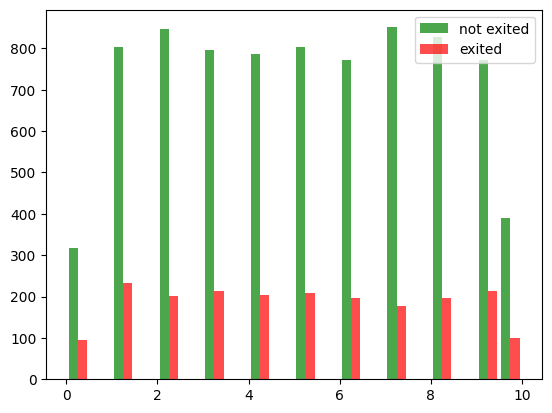

In [7]:
tenure_exit_no = train[train['Exited'] ==0]['Tenure']
tenure_exit_yes = train[train['Exited']==1]['Tenure']

plt.hist([tenure_exit_no, tenure_exit_yes], bins=20, color=['green','red'], alpha=0.7, label=['not exited','exited'])
plt.legend()

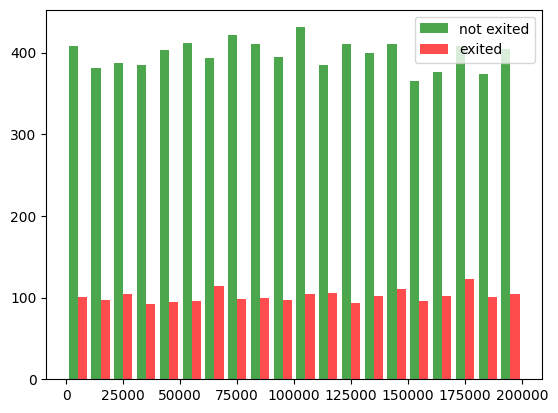

In [8]:
tenure_exit_no = train[train['Exited'] ==0]['EstimatedSalary']
tenure_exit_yes = train[train['Exited']==1]['EstimatedSalary']

plt.hist([tenure_exit_no, tenure_exit_yes], bins=20, color=['green','red'], alpha=0.7, label=['not exited','exited'])
plt.legend()

In [9]:
for column in train:
    if train[column].dtype=='object':
        print(f'{column}: {train[column].unique()}')

Geography: ['France' 'Spain' 'Germany']
Gender: ['Female' 'Male']


In [10]:
train['Gender'].replace({'Female':1,'Male':0},inplace=True)
train['Geography'].replace({'France':2,'Spain':1,'Germany':0},inplace=True)

In [11]:
for column in train:
    if train[column].dtype=='object':
        print(f'{column}: {train[column].unique()}')

In [12]:
train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,2,1,42,2,0.00,1,1,1,101348.88,1
1,608,1,1,41,1,83807.86,1,0,1,112542.58,0
2,502,2,1,42,8,159660.80,3,1,0,113931.57,1
3,699,2,1,39,1,0.00,2,0,0,93826.63,0
4,850,1,1,43,2,125510.82,1,1,1,79084.10,0


In [13]:
for column in train:
    print(f'{column}: {train[column].unique()}')

CreditScore: [619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 498 651 791 733 811 707 714 782 775 799
 602 744 588 747 583 627 731 629 438 642 806 474 559 429 680 749 734 644
 626 649 805 718 840 630 654 762 568 613 522 737 648 443 640 540 460 593
 801 611 802 745 483 690 492 709 705 5

In [14]:
col_to_scale= ['CreditScore','Tenure','Balance','EstimatedSalary','Age']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train[col_to_scale] = scaler.fit_transform(train[col_to_scale])

In [15]:
train.sample(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
4631,0.618,0,1,0.162162,0.8,0.614431,1,1,0,0.202167,0
1759,0.468,2,0,0.229730,0.9,0.000000,2,1,0,0.961940,0
1867,0.730,2,1,0.202703,0.3,0.339691,1,1,1,0.340410,0
5596,0.494,1,0,0.229730,0.9,0.000000,3,0,1,0.365884,1
675,0.426,2,1,0.283784,0.5,0.000000,2,1,1,0.087970,0
8634,0.782,2,0,0.283784,0.5,0.000000,1,0,1,0.200997,0
7592,0.648,0,0,0.351351,0.3,0.354336,1,1,0,0.368634,0
8971,0.116,2,0,0.297297,0.3,0.000000,2,0,0,0.624373,0
1391,0.850,0,1,0.270270,0.4,0.499058,2,1,1,0.078929,1
8747,0.458,2,1,0.148649,1.0,0.291730,2,1,1,0.646049,0


In [16]:
X = train.drop('Exited',axis='columns')
y = train['Exited']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [17]:
X_train.shape

(8000, 10)

In [18]:
len(X_train.columns)

10

In [19]:
X_test.shape

(2000, 10)

In [20]:
y_train.shape

(8000,)

In [21]:
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(10,), activation='relu'),
    keras.layers.Dense(6, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)

Epoch 1/100
250/250 [==============================] - 1s 2ms/step - loss: 0.5005 - accuracy: 0.7960
Epoch 2/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4689 - accuracy: 0.7981
Epoch 3/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4579 - accuracy: 0.8077
Epoch 4/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4511 - accuracy: 0.8101
Epoch 5/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4446 - accuracy: 0.8108
Epoch 6/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4395 - accuracy: 0.8120
Epoch 7/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4337 - accuracy: 0.8148
Epoch 8/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4286 - accuracy: 0.8150
Epoch 9/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4244 - accuracy: 0.8181
Epoch 10/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4205 - accura

In [22]:
model.evaluate(X_test, y_test)

63/63 [==============================] - 0s 1ms/step - loss: 0.3692 - accuracy: 0.8450


[0.36920449137687683, 0.8450000286102295]

In [23]:
yp = model.predict(X_test)
yp[:10]

63/63 [==============================] - 0s 1ms/step


array([[0.03765517],
       [0.14351758],
       [0.13474578],
       [0.1570123 ],
       [0.12778486],
       [0.17050935],
       [0.01843807],
       [0.41124177],
       [0.02513422],
       [0.81960934]], dtype=float32)

In [24]:
y_test[:10]

7054    0
442     0
3954    0
2288    0
3196    0
6178    0
8351    0
5658    1
2065    0
413     1
Name: Exited, dtype: int64

In [25]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [26]:
y_pred[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]

In [27]:
y_test[:10]

7054    0
442     0
3954    0
2288    0
3196    0
6178    0
8351    0
5658    1
2065    0
413     1
Name: Exited, dtype: int64

In [28]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.93      0.91      1595
           1       0.64      0.52      0.58       405

    accuracy                           0.84      2000
   macro avg       0.76      0.73      0.74      2000
weighted avg       0.84      0.84      0.84      2000



Text(95.72222222222221, 0.5, 'Truth')

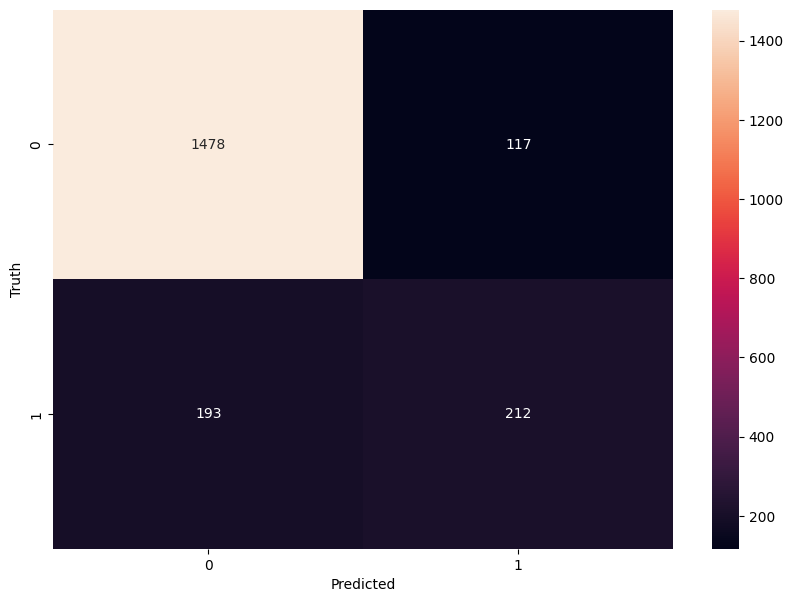

In [29]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [30]:
train.corr()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.008267,0.002857,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Geography,-0.008267,1.000000,-0.016936,-0.048092,-0.001418,-0.348700,0.006180,-0.004036,0.012692,-0.007382,-0.153771
Gender,0.002857,-0.016936,1.000000,0.027544,-0.014733,-0.012087,0.021859,-0.005766,-0.022544,0.008112,0.106512
Age,-0.003965,-0.048092,0.027544,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,-0.001418,-0.014733,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,-0.348700,-0.012087,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,0.006180,0.021859,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.004036,-0.005766,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.012692,-0.022544,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.007382,0.008112,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


<Axes: >

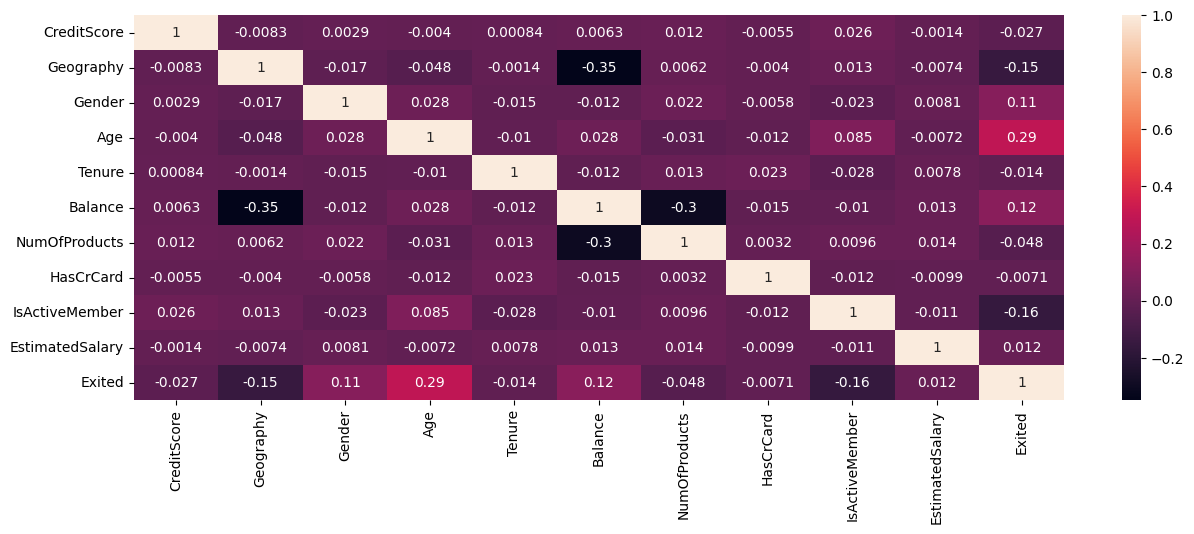

In [31]:
plt.figure(figsize=(15,5))
sns.heatmap(train.corr(),annot=True)

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Logistic Regression**

In [33]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)


LogisticRegression()

**Random Forest**

In [34]:
# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

**Gradient Boosting**

In [35]:
# Gradient Boosting
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [36]:
# Make predictions
lr_pred = lr_model.predict(X_test)
rf_pred = rf_model.predict(X_test)
gb_pred = gb_model.predict(X_test)

# Evaluate model performance
print("Logistic Regression:")
print("Classification Report:\n", classification_report(y_test, lr_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, lr_pred))

print("\nRandom Forest:")
print("Classification Report:\n", classification_report(y_test, rf_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_pred))

print("\nGradient Boosting:")
print("Classification Report:\n", classification_report(y_test, gb_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, gb_pred))

Logistic Regression:
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.97      0.89      1595
           1       0.60      0.19      0.28       405

    accuracy                           0.81      2000
   macro avg       0.71      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000

Confusion Matrix:
 [[1545   50]
 [ 330   75]]

Random Forest:
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.96      0.91      1595
           1       0.75      0.44      0.56       405

    accuracy                           0.86      2000
   macro avg       0.81      0.70      0.74      2000
weighted avg       0.85      0.86      0.84      2000

Confusion Matrix:
 [[1535   60]
 [ 226  179]]

Gradient Boosting:
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.96      0.92      1595
           1    

In [37]:
# Calculate accuracy scores
lr_accuracy = accuracy_score(y_test, lr_pred)
rf_accuracy = accuracy_score(y_test, rf_pred)
gb_accuracy = accuracy_score(y_test, gb_pred)
ann_accuracy = accuracy_score(y_test, y_pred)


# Calculate accuracy scores
lr_ConfusionMatrix = confusion_matrix(y_test, lr_pred)
rf_ConfusionMatrix = confusion_matrix(y_test, rf_pred)
gb_ConfusionMatrix = confusion_matrix(y_test, gb_pred)
ann_ConfusionMatrix = confusion_matrix(y_test, y_pred)

if len(y_test) == len(lr_pred) == len(rf_pred) == len(gb_pred) == len(y_pred):
    data = {
        'Model': ['Logistic Regression', 'Random Forest', 'Gradient Boosting', 'Neural Network'],
        'Accuracy Score': [lr_accuracy, rf_accuracy, gb_accuracy, ann_accuracy],
        'Confusion Matrix':[lr_ConfusionMatrix,rf_ConfusionMatrix,gb_ConfusionMatrix,ann_ConfusionMatrix]
    }

    accuracy_table = pd.DataFrame(data)
    print(accuracy_table)
else:
    print("Predictions have different lengths compared to y_test.")


                 Model  Accuracy Score           Confusion Matrix
0  Logistic Regression          0.8100    [[1545, 50], [330, 75]]
1        Random Forest          0.8570   [[1535, 60], [226, 179]]
2    Gradient Boosting          0.8595   [[1535, 60], [221, 184]]
3       Neural Network          0.8450  [[1478, 117], [193, 212]]
